# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    ## write code here for the Distance function here # 
    
    if Distance_Type == 'euclidean':
        # Calculate Euclidean distances
        Cluster_Distance = np.linalg.norm(Data_points[:, np.newaxis] - Cluster_Centroids, axis=2)
    elif Distance_Type == 'pearson':
        # Calculate Pearson correlation distances 
        centered_data = Data_points - np.mean(Data_points, axis=0)
        centered_centroids = Cluster_Centroids - np.mean(Cluster_Centroids, axis=0)
        numerator = np.dot(centered_data, centered_centroids.T)
        denominator = np.linalg.norm(centered_data, axis=1)[:, np.newaxis] * np.linalg.norm(centered_centroids, axis=1)
        Cluster_Distance = 1 - numerator / denominator
    else:
        raise ValueError("Invalid distance type. Choose 'euclidean' or 'pearson'.")

    return Cluster_Distance

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [181]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, max_iterations=200, tol=0.3):

    # write code for intial cluster heads here
    #_________________________________________
    # Number of features (columns) of our data
    num_features = Data_points.shape[1]

    # Initialize cluster centroids within feature ranges (in one step directly)
    Cluster_Centroids = np.random.uniform(low=Data_points.min(axis=0), high=Data_points.max(axis=0), size=(Number_of_Clusters, num_features))

    # write your your loop
    #_________________________________________

    # Initialize an array to store mean squared distances for each cluster
    mean_squared_distances_per_cluster = np.zeros(Number_of_Clusters)

    for iteration in range(max_iterations):
        # Cluster Assignment
        distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        nearest_centroid_indices = np.argmin(distances, axis=1)

        # Calculate mean squared distances
        #mean_squared_distances = np.mean(np.square(distances[np.arange(len(Data_points)), nearest_centroid_indices]))
            
        # Calculate mean squared distances for each cluster
        for i in range(Number_of_Clusters):
            cluster_points = Data_points[nearest_centroid_indices == i]
            mean_squared_distances_per_cluster[i] = np.mean(np.sum((cluster_points - Cluster_Centroids[i])**2, axis=1))

        # Update Centroids
        # prev_centroids = Cluster_Centroids.copy()
        for i in range(Number_of_Clusters):
            Cluster_Centroids[i] = np.mean(Data_points[nearest_centroid_indices == i], axis=0)

        # Calculate cluster metric (e.g. SSE) "Cost function (J)"
        cluster_metric = np.mean(np.square(distances[np.arange(len(Data_points)), nearest_centroid_indices]))

        # Check stopping condition (the value can be ammended to take more strict/lineant desicions)
        if cluster_metric < tol:
            break


    return mean_squared_distances_per_cluster, cluster_metric, iteration

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.cluster import KMeans

> #### 2.1. helper Display function 

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

In [7]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
#display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

In [8]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
# display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

In [9]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
# display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

### 3.1 Using Example 1 Data

#### 3.1.1 Applying GUC_Kmean function

In [39]:
# Run k-means clustering
final_cluster_distances_1, distortion_1, iterations_1 = GUC_Kmean(X1, 3, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_1, '\n')
print("Distortion (SSE):", distortion_1, '\n')
print("Number of iterations: ", iterations_1)

Final cluster distances:
[0.33793473 0.25706998 0.33793473] 

Distortion (SSE): 0.3136753072785584 

Number of iterations:  199


#### 3.1.2 Different number of clusters

In [23]:
# Run k-means clustering
final_cluster_distances_11, distortion_11, iterations_11 = GUC_Kmean(X1, 7, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_11, '\n')
print("Distortion (SSE):", distortion_11, '\n')
print("Number of iterations: ", iterations_11)

Final cluster distances:
[0.12361926 0.02447174 0.0873538  0.06419333 0.06419333 0.06525798
 0.04894348] 

Distortion (SSE): 0.074215138696797 

Number of iterations:  1


In [30]:
# Run k-means clustering
final_cluster_distances_12, distortion_12, iterations_12 = GUC_Kmean(X1, 5, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_12, '\n')
print("Distortion (SSE):", distortion_12, '\n')
print("Number of iterations: ", iterations_12)

Final cluster distances:
[0.06525798 0.0873538  0.25706998 0.1176264  0.13978383] 

Distortion (SSE): 0.15149480731726078 

Number of iterations:  1


#### 3.1.3 Displaying the results

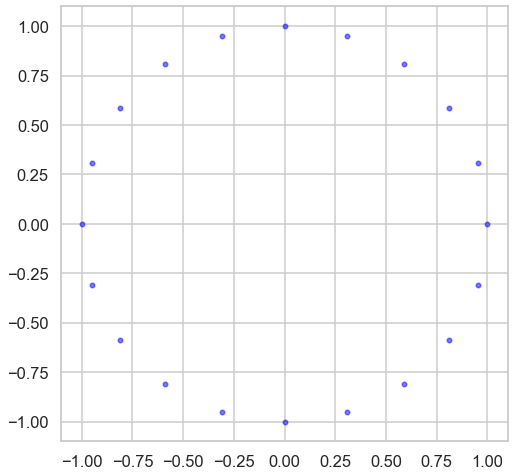

In [31]:
display_cluster(X1)

#### 3.1.4 Cluster Performance Metric vs. Number of clusters

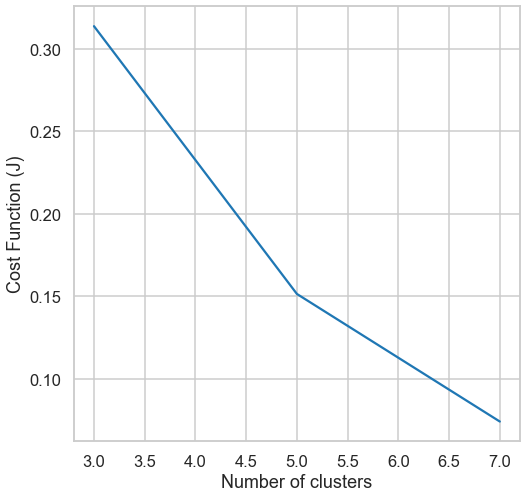

In [40]:
plt.plot([3, 5, 7], [distortion_1, distortion_12, distortion_11] )
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.show()

#### 3.1.5 Change the Distance Function and repeat

In [55]:
# Run k-means clustering
final_cluster_distances_1p, distortion_1p, iterations_1p = GUC_Kmean(X1, 3, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_1p, '\n')
print("Distortion (SSE):", distortion_1p, '\n')
print("Number of iterations: ", iterations_1p)

Final cluster distances:
[0.39237008 0.43329463 0.45680442] 

Distortion (SSE): 0.05260560925851069 

Number of iterations:  0


In [56]:
# Run k-means clustering
final_cluster_distances_11p, distortion_11p, iterations_11p = GUC_Kmean(X1, 5, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_11p, '\n')
print("Distortion (SSE):", distortion_11p, '\n')
print("Number of iterations: ", iterations_11p)

Final cluster distances:
[0.36395131 1.56074329 0.47108059 0.11681104 0.55828605] 

Distortion (SSE): 0.029099807688320545 

Number of iterations:  0


In [58]:
# Run k-means clustering
final_cluster_distances_12p, distortion_12p, iterations_12p = GUC_Kmean(X1, 7, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_12p, '\n')
print("Distortion (SSE):", distortion_12p, '\n')
print("Number of iterations: ", iterations_12p)

Final cluster distances:
[0.09008858 0.43010943 0.11889841 0.46262503 0.07393492 0.1268784
 0.27247047] 

Distortion (SSE): 0.004640235707988516 

Number of iterations:  0


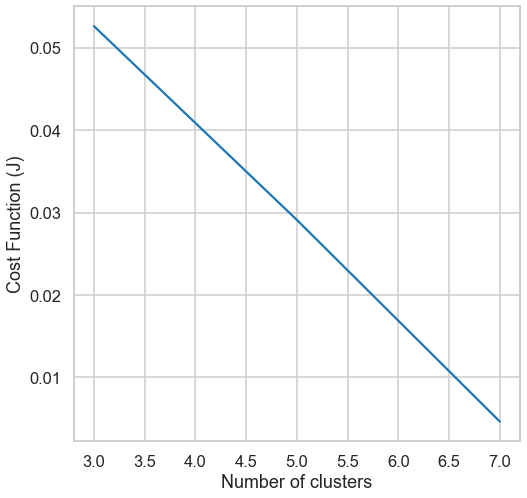

In [59]:
plt.plot([3, 5, 7], [distortion_1p, distortion_11p, distortion_12p] )
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.show()

### 3.2 Using Example 2 Data

#### 3.2.1 Applying GUC_Kmean function

In [77]:
# Run k-means clustering
final_cluster_distances_2, distortion_2, iterations_2 = GUC_Kmean(X2, 3, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_2, '\n')
print("Distortion (SSE):", distortion_2, '\n')
print("Number of iterations: ", iterations_2)

Final cluster distances:
[4.84424532 4.0934867  5.66390532] 

Distortion (SSE): 4.937314260192344 

Number of iterations:  199


#### 3.2.2 Different number of clusters

In [78]:
# Run k-means clustering
final_cluster_distances_21, distortion_21, iterations_21 = GUC_Kmean(X2, 5, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_21, '\n')
print("Distortion (SSE):", distortion_21, '\n')
print("Number of iterations: ", iterations_21)

Final cluster distances:
[1.88683773 1.95232648 1.75741128 1.80946671 1.93110749] 

Distortion (SSE): 1.8689393400756849 

Number of iterations:  199


In [88]:
# Run k-means clustering
final_cluster_distances_22, distortion_22, iterations_22 = GUC_Kmean(X2, 7, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_22, '\n')
print("Distortion (SSE):", distortion_22, '\n')
print("Number of iterations: ", iterations_22)

Final cluster distances:
[1.60624178 1.10381543 1.67221201 1.83676332 1.33929113 1.91349332
 1.32064645] 

Distortion (SSE): 1.5964404105252548 

Number of iterations:  199


#### 3.2.3 Display the results

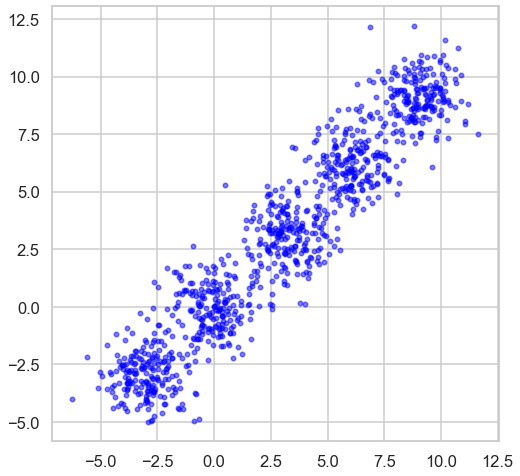

In [89]:
display_cluster(X2)

#### 3.2.4 Cluster Performance Metric vs. Number of Clusters

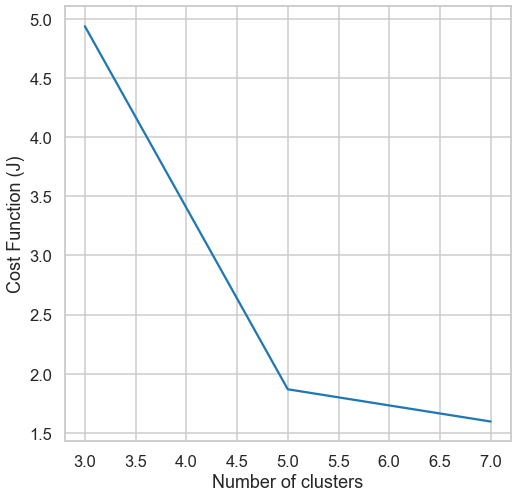

In [90]:
plt.plot([3, 5, 7], [distortion_2, distortion_21, distortion_22] )
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.show()

#### 3.2.5 Change the distance type and repeat

In [91]:
# Run k-means clustering
final_cluster_distances_2p, distortion_2p, iterations_2p = GUC_Kmean(X2, 3, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_2p, '\n')
print("Distortion (SSE):", distortion_2p, '\n')
print("Number of iterations: ", iterations_2p)

Final cluster distances:
[41.9438778  12.08356575 60.96474596] 

Distortion (SSE): 0.06418258726576759 

Number of iterations:  0


In [92]:
# Run k-means clustering
final_cluster_distances_21p, distortion_21p, iterations_21p = GUC_Kmean(X2, 5, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_21p, '\n')
print("Distortion (SSE):", distortion_21p, '\n')
print("Number of iterations: ", iterations_21p)

Final cluster distances:
[22.3933796  39.29648618 22.40985873 57.49521542 45.4670546 ] 

Distortion (SSE): 0.004334392887698577 

Number of iterations:  0


In [95]:
# Run k-means clustering
final_cluster_distances_22p, distortion_22p, iterations_22p = GUC_Kmean(X2, 7, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_22p, '\n')
print("Distortion (SSE):", distortion_22p, '\n')
print("Number of iterations: ", iterations_22p)

Final cluster distances:
[10.51881885 16.79669681 33.45145783  8.53167146 18.03254044 45.78839649
 22.9082464 ] 

Distortion (SSE): 0.004342300469790706 

Number of iterations:  0


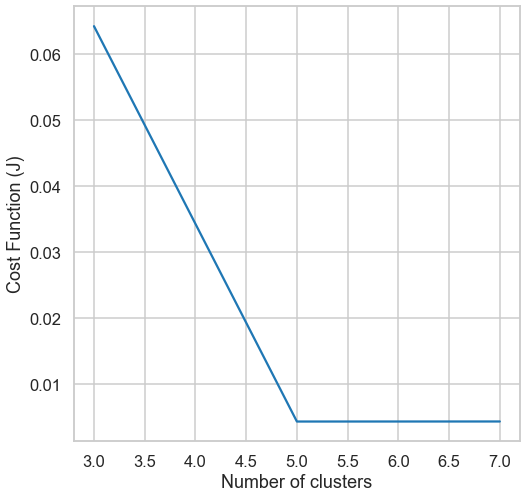

In [96]:
plt.plot([3, 5, 7], [distortion_2p, distortion_21p, distortion_22p] )
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.show()

### 3.3 Using Example 3 Data

#### 3.3.1 Apply GUC_Kmean function

In [97]:
# Run k-means clustering
final_cluster_distances_3, distortion_3, iterations_3 = GUC_Kmean(X3, 3, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_3, '\n')
print("Distortion (SSE):", distortion_3, '\n')
print("Number of iterations: ", iterations_3)

Final cluster distances:
[0.38392751 0.27896802 0.1249677 ] 

Distortion (SSE): 0.2979265281406716 

Number of iterations:  4


#### 3.3.2 Different number of Clusters

In [98]:
# Run k-means clustering
final_cluster_distances_31, distortion_31, iterations_31 = GUC_Kmean(X3, 5, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_31, '\n')
print("Distortion (SSE):", distortion_31, '\n')
print("Number of iterations: ", iterations_31)

Final cluster distances:
[0.33108666 0.13371573 0.16589886 0.31996477 0.18272188] 

Distortion (SSE): 0.2581259703420033 

Number of iterations:  1


In [99]:
# Run k-means clustering
final_cluster_distances_32, distortion_32, iterations_32 = GUC_Kmean(X3, 7, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances_32, '\n')
print("Distortion (SSE):", distortion_32, '\n')
print("Number of iterations: ", iterations_32)

Final cluster distances:
[0.18076545 0.22251113 0.32182815 0.1445109  0.16073447 0.41662891
 0.14911499] 

Distortion (SSE): 0.24367079668691236 

Number of iterations:  0


#### 3.3.3 Display the results

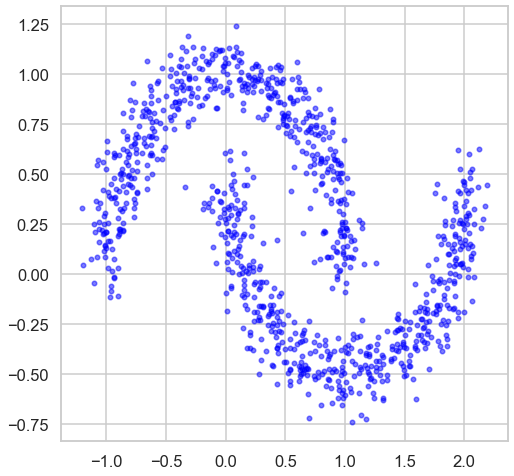

In [100]:
display_cluster(X3)

#### 3.3.4 Cluster Performance Metric vs. Number of Clusters

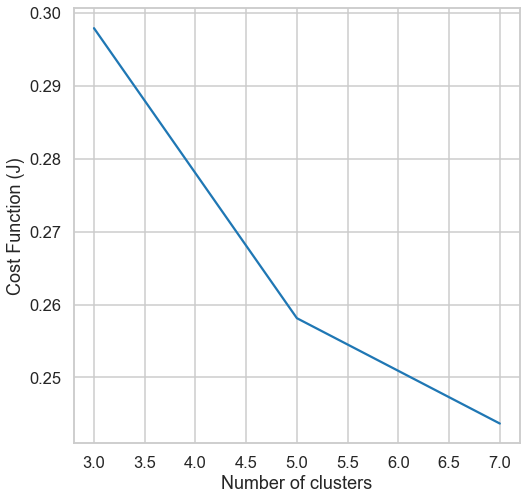

In [101]:
plt.plot([3, 5, 7], [distortion_3, distortion_31, distortion_32] )
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.show()

#### 3.3.5 Change the distance type and repeat

In [102]:
# Run k-means clustering
final_cluster_distances_3p, distortion_3p, iterations_3p = GUC_Kmean(X3, 3, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_3p, '\n')
print("Distortion (SSE):", distortion_3p, '\n')
print("Number of iterations: ", iterations_3p)

Final cluster distances:
[0.28528394 0.73309716 0.52841457] 

Distortion (SSE): 0.06477349033454391 

Number of iterations:  0


In [103]:
# Run k-means clustering
final_cluster_distances_31p, distortion_31p, iterations_31p = GUC_Kmean(X3, 5, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_31p, '\n')
print("Distortion (SSE):", distortion_31p, '\n')
print("Number of iterations: ", iterations_31p)

Final cluster distances:
[0.36045219 0.81859965 1.15906874 0.58555695 0.15766646] 

Distortion (SSE): 0.05200643608126652 

Number of iterations:  0


In [104]:
# Run k-means clustering
final_cluster_distances_32p, distortion_32p, iterations_32p = GUC_Kmean(X3, 7, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances_32p, '\n')
print("Distortion (SSE):", distortion_32p, '\n')
print("Number of iterations: ", iterations_32p)

Final cluster distances:
[0.17328394 0.76772269 0.44517952 0.36121626 0.45448772 0.25052924
 0.53151701] 

Distortion (SSE): 0.013485085215325572 

Number of iterations:  0


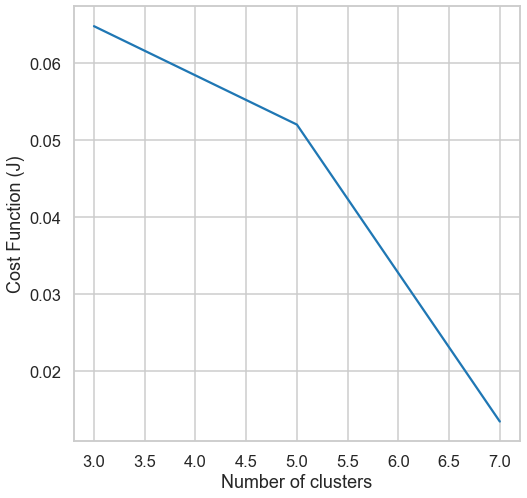

In [105]:
plt.plot([3, 5, 7], [distortion_3p, distortion_31p, distortion_32p] )
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [107]:
# Read the csv file 
df = pd.read_csv("Customer_data.csv")
df.shape

(2000, 8)

In [141]:
# Convert it to numpy array as our function deals with numpy.array
dfarray = df.to_numpy()
dfarray.shape

(2000, 8)

In [139]:
# Apply the GUC_Kmean function
final_cluster_distances, distortion, iterations = GUC_Kmean(dfarray, 3, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances, '\n')
print("Distortion (SSE):", distortion, '\n')
print("Number of iterations: ", iterations)

Final cluster distances:
[1.13400163e+09 2.83067948e+08 2.54526695e+08] 

Distortion (SSE): 337933346.6297763 

Number of iterations:  199


In [146]:
# Apply the GUC_Kmean function with 5 clusters
final_cluster_distances5, distortion5, iterations5 = GUC_Kmean(dfarray, 5, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances5, '\n')
print("Distortion (SSE):", distortion5, '\n')
print("Number of iterations: ", iterations5)

Final cluster distances:
[1.36248084e+08 1.83686140e+08 5.92023357e+07 8.66491553e+08
 7.55694968e+07] 

Distortion (SSE): 124794669.00934175 

Number of iterations:  199


In [147]:
# Apply the GUC_Kmean function with 7 clusters
final_cluster_distances7, distortion7, iterations7 = GUC_Kmean(dfarray, 7, Distance_Type='euclidean')
print("Final cluster distances:")
print(final_cluster_distances7, '\n')
print("Distortion (SSE):", distortion7, '\n')
print("Number of iterations: ", iterations7)

Final cluster distances:
[4.81673007e+07 6.79850275e+07 1.14612940e+08 4.99010491e+07
 3.58921829e+07 1.92476146e+08 3.13732488e+08] 

Distortion (SSE): 66397072.3608968 

Number of iterations:  199


Try pearson distance type

In [148]:
# Apply the GUC_Kmean function with 'pearson' distance type
final_cluster_distancesP, distortionP, iterationsP = GUC_Kmean(dfarray, 3, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distancesP, '\n')
print("Distortion (SSE):", distortionP, '\n')
print("Number of iterations: ", iterationsP)

Final cluster distances:
[3.49690880e+09 1.07171847e+10 3.80755011e+08] 

Distortion (SSE): 0.0038784199372136267 

Number of iterations:  0


In [160]:
# Apply the GUC_Kmean function with 'pearson' distance type and 5 clusters
final_cluster_distances5P, distortion5P, iterations5P = GUC_Kmean(dfarray, 5, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances5P, '\n')
print("Distortion (SSE):", distortion5P, '\n')
print("Number of iterations: ", iterations5P)

Final cluster distances:
[1.41299922e+06 4.10795166e+08 1.28204295e+09 6.49930338e+07
 1.44742107e+09] 

Distortion (SSE): 0.003257926005757718 

Number of iterations:  0


In [163]:
# Apply the GUC_Kmean function with 'pearson' distance type and 7 clusters
final_cluster_distances7P, distortion7P, iterations7P = GUC_Kmean(dfarray, 7, Distance_Type='pearson')
print("Final cluster distances:")
print(final_cluster_distances7P, '\n')
print("Distortion (SSE):", distortion7P, '\n')
print("Number of iterations: ", iterations7P)

Final cluster distances:
[4.07784459e+09 9.80925860e+09 1.26988944e+10 5.77713041e+09
 1.66035558e+10 3.28263163e+08 7.57046072e+08] 

Distortion (SSE): 0.0019290026263906962 

Number of iterations:  0


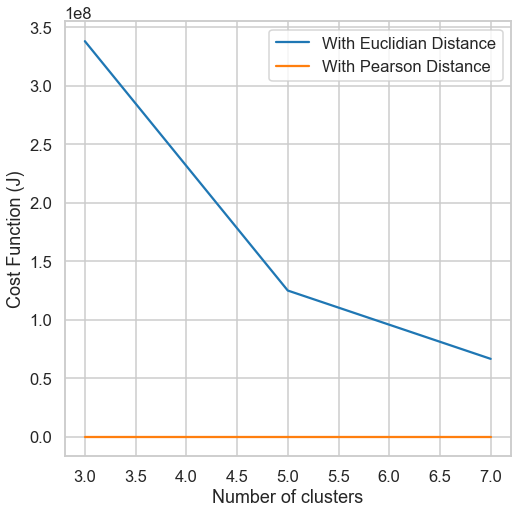

In [165]:
plt.plot([3, 5, 7], [distortion, distortion5, distortion7], label="With Euclidian Distance")
plt.plot([3, 5, 7], [distortionP, distortion5P, distortion7P], label="With Pearson Distance")
plt.xlabel("Number of clusters")
plt.ylabel("Cost Function (J)") 
plt.legend()
plt.show()

Using predefined modules to print our Clusters

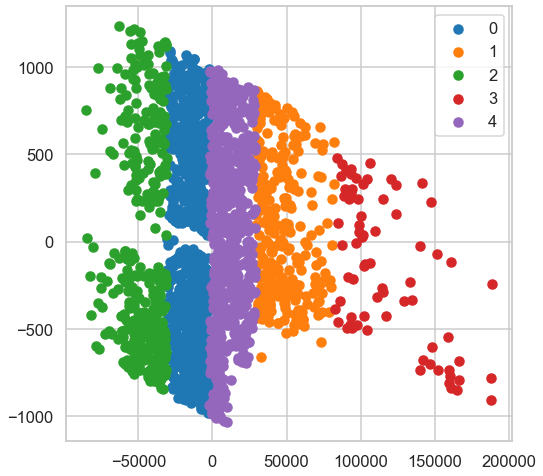

In [180]:
#Importing required modules
from sklearn.decomposition import PCA

#Load Data
data = df
pca = PCA(2)
 
#Transform the data
df_transformed = pca.fit_transform(data)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_transformed)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df_transformed[label == i , 0] , df_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()